Importing Libriaries and Loading API DataFrame

In [1]:
import requests
import json
import pandas as pd
import geopandas as gpd


api_url = pd.DataFrame({
    'API_URL': [
        'https://maps2.bristol.gov.uk/server2/rest/services/ext/air_quality/MapServer/0/query?outFields=*&where=1%3D1&f=geojson'
    ]
})

# Reading the API

for i in api_url['API_URL']:
    response = requests.get(i)
    if response.status_code == 200:
        print(f"Source Data from Bristol.go.uk Website {i}:")
        print(response.json())
    else:
        print(f"Failed to fetch from {i}")

Source Data from Bristol.go.uk Website https://maps2.bristol.gov.uk/server2/rest/services/ext/air_quality/MapServer/0/query?outFields=*&where=1%3D1&f=geojson:
{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'id': 1, 'geometry': {'type': 'Point', 'coordinates': [-2.6277488032062446, 51.407745517999835]}, 'properties': {'OBJECTID': 1, 'siteNo': '1', 'location': 'Withywood School', 'SiteID': 1, 'Easting': 356434, 'Northing': 167823, 'Current_': 'No', 'pollutants': 'BTX NO2', 'InstrumentID': 1, 'Exposure': 'No', 'tube_kerb': 0, 'rec_kerb': 0, 'comments': '', 'AQMA': 'Yes', 'Detailed_Location': '', 'Tube_Height': None, 'Elevation': None, 'Grid_ID': None, 'LocationClass': 'Urban Traffic', 'LAQM_Locationclass': 'Roadside', 'Survey': 'Other (DT)', 'RouteID': None, 'RouteSequenceID': None, 'Description': '', 'DateStart': None, 'DateEnd': None, 'Colocated': None, 'Duplicate_Triplicate': '', 'obstruction_m': None, 'obstruction_lt': 'No', 'inlet_flow_clear': 'No', 'junction_m': None

In [3]:
if response.status_code == 200:
    print("API load successful. Status code:", response.status_code)
else:
    print("API load failed. Status code:", response.status_code)

API load successful. Status code: 200


defining my dataframe

In [4]:
dataframe_df = api_url

saving dataframe im my folder to allow transformation

In [5]:
dataframe_df.to_csv("C:/Users/aldom/Documents/Data_Enginnering/Final_ETL_Portfolio_Submission/dataframe_df.csv", index=False)

With this step I am using a try and error technique using the most common encoding types to allow the next stages of the transformation

In [6]:
with open("C:/Users/aldom/Documents/Data_Enginnering/Final_ETL_Portfolio_Submission/api_data.geojson", encoding="ISO-8859-1") as f:
    content = f.read()
    print(content)


{
"type": "FeatureCollection",
"name": "api_data",
"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },
"features": [
{ "type": "Feature", "properties": { "OBJECTID": 1, "siteNo": "1", "location": "Withywood School", "SiteID": 1, "Easting": 356434, "Northing": 167823, "Current_": "No", "pollutants": "BTX NO2", "InstrumentID": 1, "Exposure": "No", "tube_kerb": 0.0, "rec_kerb": 0.0, "comments": "", "AQMA": "Yes", "Detailed_Location": "", "Tube_Height": null, "Elevation": null, "Grid_ID": null, "LocationClass": "Urban Traffic", "LAQM_Locationclass": "Roadside", "Survey": "Other (DT)", "RouteID": null, "RouteSequenceID": null, "Description": "", "DateStart": null, "DateEnd": null, "Colocated": null, "Duplicate_Triplicate": "", "obstruction_m": null, "obstruction_lt": "No", "inlet_flow_clear": "No", "junction_m": null, "x": -2.627748803206245, "y": 51.407745517999835, "x_normalized": 0.45076298550013316, "y_normalized": 0.090933038267678512 }, "geometry": { 

In [7]:
dataframe_df = gpd.read_file("C:/Users/aldom/Documents/Data_Enginnering/Final_ETL_Portfolio_Submission/api_data.geojson", encoding="ISO-8859-1")

normalizing geometry with 0,1 vaules

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Extracting the coordinates

dataframe_df['x'] = dataframe_df.geometry.x
dataframe_df['y'] = dataframe_df.geometry.y

# Normalizing 

normalized_scale = MinMaxScaler()
dataframe_df[['x_normalized', 'y_normalized']] = normalized_scale.fit_transform(dataframe_df[['x', 'y']])


print(dataframe_df[['geometry', 'x_normalized', 'y_normalized']].head())

                    geometry  x_normalized  y_normalized
0  POINT (-2.62775 51.40775)      0.450763      0.090933
1  POINT (-2.59681 51.45456)      0.515873      0.293816
2  POINT (-2.61399 51.46921)      0.479713      0.357306
3  POINT (-2.57833 51.44421)      0.554769      0.248973
4  POINT (-2.59529 51.44281)      0.519071      0.242914


In [8]:
# Check values

check_x = dataframe_df['x_normalized'].between(0, 1).all()
check_y = dataframe_df['y_normalized'].between(0, 1).all()

print(f"x is normalized: {check_x}")
print(f"y is normalized: {check_y}")

x is normalized: True
y is normalized: True


Updating the geometry column with the normalized values

In [9]:
from shapely.geometry import Point

# Column update

dataframe_df['geometry'] = dataframe_df.apply(lambda row: Point(row['x_normalized'], row['y_normalized']), axis=1)

print(dataframe_df[['geometry', 'x_normalized', 'y_normalized']].head())

                  geometry  x_normalized  y_normalized
0  POINT (0.45076 0.09093)      0.450763      0.090933
1  POINT (0.51587 0.29382)      0.515873      0.293816
2  POINT (0.47971 0.35731)      0.479713      0.357306
3  POINT (0.55477 0.24897)      0.554769      0.248973
4  POINT (0.51907 0.24291)      0.519071      0.242914


SiteID, location, siteNo, siteNo, x_normalized, y_normalized, geometry                        

In [10]:
null_counts = dataframe_df.isnull().sum()
print(null_counts)

OBJECTID                  0
siteNo                   11
location                  0
SiteID                    0
Easting                   0
Northing                  0
Current_                  0
pollutants                0
InstrumentID              0
Exposure                  0
tube_kerb               378
rec_kerb                379
comments                 11
AQMA                      0
Detailed_Location        11
Tube_Height             368
Elevation                13
Grid_ID                 104
LocationClass            11
LAQM_Locationclass        0
Survey                   10
RouteID                 700
RouteSequenceID         607
Description              11
DateStart               533
DateEnd                 690
Colocated               692
Duplicate_Triplicate     11
obstruction_m           499
obstruction_lt           11
inlet_flow_clear         11
junction_m              499
x                         0
y                         0
x_normalized              0
y_normalized        

fitting the transforemd data

In [ ]:
# fit the data in latitude (normalized)

dataframe_df['Latitude (normalized)'] = list(zip(dataframe_df['x_normalized'], dataframe_df['y_normalized']))
print(dataframe_df[['x_normalized', 'y_normalized', 'Latitude (normalized)']].head())

   x_normalized  y_normalized                       Latitude (normalized)
0      0.450763      0.090933  (0.45076298550013316, 0.09093303826767851)
1      0.515873      0.293816    (0.5158727171676434, 0.2938159127984079)
2      0.479713      0.357306     (0.479712873484198, 0.3573055285403086)
3      0.554769      0.248973    (0.5547692739533074, 0.2489726016785312)
4      0.519071      0.242914    (0.5190709212978044, 0.2429141946354605)


In [12]:
# select the relevant columns
dataframe_df = dataframe_df[['SiteID', 'location', 'siteNo','Latitude (normalized)']]
print(dataframe_df.head())

   SiteID           location siteNo  \
0       1   Withywood School      1   
1       2     Colston Avenue     B1   
2       3      Blackboy Hill    B10   
3       4        Three Lamps    B11   
4       5  Bedminster Parade    B12   

                        Latitude (normalized)  
0  (0.45076298550013316, 0.09093303826767851)  
1    (0.5158727171676434, 0.2938159127984079)  
2     (0.479712873484198, 0.3573055285403086)  
3    (0.5547692739533074, 0.2489726016785312)  
4    (0.5190709212978044, 0.2429141946354605)  


In [13]:
# rename the columns as asked in the exercise
dataframe_df.rename(columns={'SiteID': 'ID', 'siteNo': 'Location Type'}, inplace=True)
print(dataframe_df.head())

   ID           location Location Type  \
0   1   Withywood School             1   
1   2     Colston Avenue            B1   
2   3      Blackboy Hill           B10   
3   4        Three Lamps           B11   
4   5  Bedminster Parade           B12   

                        Latitude (normalized)  
0  (0.45076298550013316, 0.09093303826767851)  
1    (0.5158727171676434, 0.2938159127984079)  
2     (0.479712873484198, 0.3573055285403086)  
3    (0.5547692739533074, 0.2489726016785312)  
4    (0.5190709212978044, 0.2429141946354605)  


In [14]:
print(dataframe_df.dtypes)

ID                        int32
location                 object
Location Type            object
Latitude (normalized)    object
dtype: object


In [15]:
final_data = dataframe_df.copy()
print(final_data.head())

   ID           location Location Type  \
0   1   Withywood School             1   
1   2     Colston Avenue            B1   
2   3      Blackboy Hill           B10   
3   4        Three Lamps           B11   
4   5  Bedminster Parade           B12   

                        Latitude (normalized)  
0  (0.45076298550013316, 0.09093303826767851)  
1    (0.5158727171676434, 0.2938159127984079)  
2     (0.479712873484198, 0.3573055285403086)  
3    (0.5547692739533074, 0.2489726016785312)  
4    (0.5190709212978044, 0.2429141946354605)  


In [16]:
#save the final data to a CSV file
final_data.to_csv("C:\\Users\\aldom\\Documents\\Data_Enginnering\\Final_ETL_Portfolio_Submission\\final_data.csv", index=False)

In [17]:
import os
import sys

os.environ["JAVA_HOME"] = "JDK 8"
os.environ["PYSPARK_PYTHON"] = sys.executable
os.environ["PYSPARK_DRIVER_PYTHON"] = sys.executable

In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [19]:
# Create a Spark session
Spark_Session = SparkSession.builder \
    .appName("AirQualityBristol") \
    .getOrCreate()

print(Spark_Session)

In [20]:
# Load the final_data.csv into a Spark DataFrame
Air_Quality_Bristol_df = Spark_Session.read.csv("C:\\Users\\aldom\\Documents\\Data_Enginnering\\Final_ETL_Portfolio_Submission\\final_data.csv", header=True, inferSchema=True)

Air_Quality_Bristol_df.printSchema()
Air_Quality_Bristol_df.show(5)

root
 |-- ID: integer (nullable = true)
 |-- location: string (nullable = true)
 |-- Location Type: string (nullable = true)
 |-- Latitude (normalized): string (nullable = true)

+---+-----------------+-------------+---------------------+
| ID|         location|Location Type|Latitude (normalized)|
+---+-----------------+-------------+---------------------+
|  1| Withywood School|            1| (0.45076298550013...|
|  2|   Colston Avenue|           B1| (0.51587271716764...|
|  3|    Blackboy Hill|          B10| (0.47971287348419...|
|  4|      Three Lamps|          B11| (0.55476927395330...|
|  5|Bedminster Parade|          B12| (0.51907092129780...|
+---+-----------------+-------------+---------------------+
only showing top 5 rows



In [ ]:
#create the new spark session
sql_spark = SparkSession.builder.appName("ETLAssignment").getOrCreate()

In [22]:
# load the CSV file into a DataFrame in PostgreSQL

pg_url = "jdbc:postgresql://localhost:5432/ETLAssignment"
my_account = {
    "user": "postgres",
    "password": "050887",
    "driver": "org.postgresql.Driver"
}

# Write the transformed data to the database

Air_Quality_Bristol_df.write.jdbc(
    url=pg_url, \
    table="AirQualityBristol",
    mode="overwrite",
    properties=my_account
)

Visualizing data

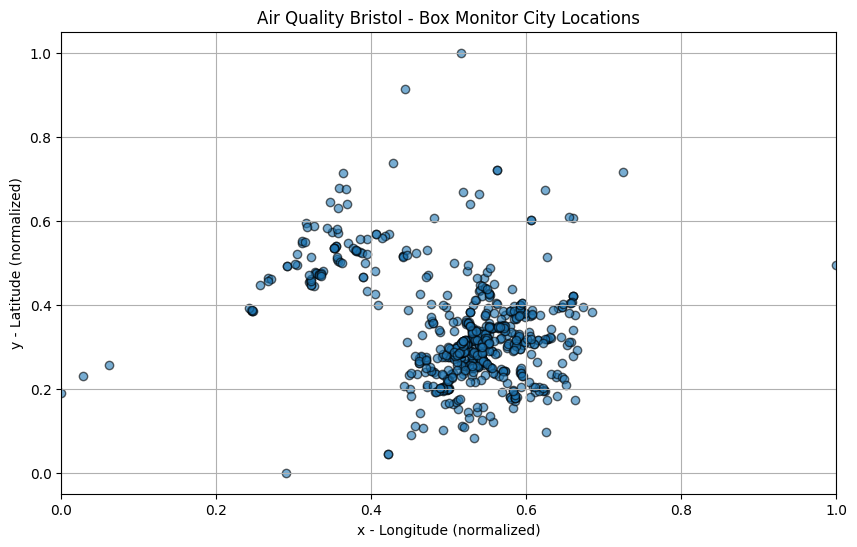

In [23]:
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame
pandas_df = Air_Quality_Bristol_df.toPandas()

# Extract x and y coordinates from 'Latitude (normalized)'
pandas_df['x_normalized'] = pandas_df['Latitude (normalized)'].apply(lambda x: float(x.strip('()').split(',')[0]))
pandas_df['y_normalized'] = pandas_df['Latitude (normalized)'].apply(lambda x: float(x.strip('()').split(',')[1]))

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(pandas_df['x_normalized'], pandas_df['y_normalized'], alpha=0.6, edgecolor='k')
plt.title('Air Quality Bristol - Box Monitor City Locations')
plt.xlabel('x - Longitude (normalized)')
plt.ylabel('y - Latitude (normalized)')
plt.xlim(0, 1)
plt.grid(True)
plt.show()

Counting Total number of locations

In [24]:
total_locations = Air_Quality_Bristol_df.select("location").distinct().count()
print(f"The Total number of locations is: {total_locations}")
print("This is the number of Box Monitor Around Bristol City")

The Total number of locations is: 674
This is the number of Box Monitor Around Bristol City
